<h1>ENHANCING ELECTRIC VEHICLE CHARGING INFRASTRUCTURE : A NETWORK ANALYSIS BASED ON REAL-TIME USAGE AND GEOGRAPHICAL DATA</h1>

In [1]:
import numpy as npa
import pandas as pd
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite
from dateutil.tz import tzlocal
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Data Cleaning and Preprocessing

In [2]:
#reading the csv file into the pandas dataframe
df = pd.read_csv("ElectricVehicleChargingStationUsageJuly2011Dec2020_2797601698338421488.csv")

In [3]:
#This displays first 5 rows from the dataset
pd.set_option('display.max_columns', None)
df.head()

Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/29/2011 23:20                   3:03:32   
1                  7/30/2011 0:02                   0:02:06   
2                 7/30/2011 12:34                   4:17:32   
3                 7/30/2011 16:55                   2:03:24   
4                 7/30/2011 20:03                   1:11:24   

  Charging Time (hh:mm:ss)  Energy (kWh)  GHG Savings (kg)  \
0                  1:54:03      6.249457             2.625   
1                  0:01:54      0.106588             0.045   
2                  4:17:28     14.951777             6.280   
3                  2:02:58      7.159643             3.007   
4                  0:43:54      1.957765             0.822   

   Gasoline Savings (gallons) Port Type  Port Number Plug Type  EVSE ID  \
0                       0.784   Level 2            2     J1772      NaN   
1                       0.013   Level 2            2     J1772      NaN   
2                       1.876   Level 2            2     J1772      NaN   
3                       0.899   Level 2            2     J1772      NaN   
4                       0.246   Level 2            2     J1772      NaN   

          Address 1       City State/Province  Postal Code        Country  \
0  250 Hamilton Ave  Palo Alto     California        94301  United States   
1  250 Hamilton Ave  Palo Alto     California        94301  United States   
2  250 Hamilton Ave  Palo Alto     California        94301  United States   
3  250 Hamilton Ave  Palo Alto     California        94301  United States   
4  250 Hamilton Ave  Palo Alto     California        94301  United States   

    Latitude   Longitude Currency  Fee             Ended By  Plug In Event Id  \
0  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 3   
1  37.444572 -122.160309      USD    0             Customer                 4   
2  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 5   
3  37.444572 -122.160309      USD    0             Customer                 6   
4  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 7   

   Driver Postal Code  User ID  County  System S/N  Model Number  
0             95124.0   3284.0     NaN         NaN           NaN  
1             94301.0   4169.0     NaN         NaN           NaN  
2             94301.0   4169.0     NaN         NaN           NaN  
3             94302.0   2545.0     NaN         NaN           NaN  
4             94043.0   3765.0     NaN         NaN           NaN

In [4]:
#checking how many charging stations we have in palo alto
distinct_station_names = df['Station Name'].unique()
distinct_station_names_list = list(distinct_station_names) #converting to list for better view
distinct_station_names_list

['PALO ALTO CA / HAMILTON #1',
 'PALO ALTO CA / HAMILTON #2',
 'PALO ALTO CA / HIGH #4',
 'PALO ALTO CA / BRYANT #2',
 'PALO ALTO CA / BRYANT #1']

In [5]:
#number of rows in dataframe
len(df)

9999

In [6]:
#checking the null values for each column in the dataset
df.isnull().sum()

Station Name                          0
MAC Address                           0
Org Name                              0
Start Date                            0
Start Time Zone                       0
End Date                              0
End Time Zone                         0
Transaction Date (Pacific Time)       0
Total Duration (hh:mm:ss)             0
Charging Time (hh:mm:ss)              0
Energy (kWh)                          0
GHG Savings (kg)                      0
Gasoline Savings (gallons)            0
Port Type                             0
Port Number                           0
Plug Type                             0
EVSE ID                            9999
Address 1                             0
City                                  0
State/Province                        0
Postal Code                           0
Country                               0
Latitude                              0
Longitude                             0
Currency                           1500


In [7]:
#dropping four columns which has all vlaues empty
df = df.drop(columns=['EVSE ID', 'County', 'System S/N', 'Model Number'])

In [8]:
#to show first five rows and all columns
pd.set_option('display.max_columns', None)
df.head()

Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/29/2011 23:20                   3:03:32   
1                  7/30/2011 0:02                   0:02:06   
2                 7/30/2011 12:34                   4:17:32   
3                 7/30/2011 16:55                   2:03:24   
4                 7/30/2011 20:03                   1:11:24   

  Charging Time (hh:mm:ss)  Energy (kWh)  GHG Savings (kg)  \
0                  1:54:03      6.249457             2.625   
1                  0:01:54      0.106588             0.045   
2                  4:17:28     14.951777             6.280   
3                  2:02:58      7.159643             3.007   
4                  0:43:54      1.957765             0.822   

   Gasoline Savings (gallons) Port Type  Port Number Plug Type  \
0                       0.784   Level 2            2     J1772   
1                       0.013   Level 2            2     J1772   
2                       1.876   Level 2            2     J1772   
3                       0.899   Level 2            2     J1772   
4                       0.246   Level 2            2     J1772   

          Address 1       City State/Province  Postal Code        Country  \
0  250 Hamilton Ave  Palo Alto     California        94301  United States   
1  250 Hamilton Ave  Palo Alto     California        94301  United States   
2  250 Hamilton Ave  Palo Alto     California        94301  United States   
3  250 Hamilton Ave  Palo Alto     California        94301  United States   
4  250 Hamilton Ave  Palo Alto     California        94301  United States   

    Latitude   Longitude Currency  Fee             Ended By  Plug In Event Id  \
0  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 3   
1  37.444572 -122.160309      USD    0             Customer                 4   
2  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 5   
3  37.444572 -122.160309      USD    0             Customer                 6   
4  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 7   

   Driver Postal Code  User ID  
0             95124.0   3284.0  
1             94301.0   4169.0  
2             94301.0   4169.0  
3             94302.0   2545.0  
4             94043.0   3765.0

In [9]:
#checking null values for each column in the dataset
df.isnull().sum()

Station Name                          0
MAC Address                           0
Org Name                              0
Start Date                            0
Start Time Zone                       0
End Date                              0
End Time Zone                         0
Transaction Date (Pacific Time)       0
Total Duration (hh:mm:ss)             0
Charging Time (hh:mm:ss)              0
Energy (kWh)                          0
GHG Savings (kg)                      0
Gasoline Savings (gallons)            0
Port Type                             0
Port Number                           0
Plug Type                             0
Address 1                             0
City                                  0
State/Province                        0
Postal Code                           0
Country                               0
Latitude                              0
Longitude                             0
Currency                           1500
Fee                                   0


In [10]:
#checking unique values in country- if same country then we can USD for all missing values in currency
distinct_country_names = df['Country'].unique()
distinct_country_names

array(['United States'], dtype=object)

In [11]:
#checking currency column unique values
distinct_Currency_names = df['Currency'].unique()
distinct_Currency_names

array(['USD', nan], dtype=object)

In [12]:
#curreny has 1500 missing values and replaced all missing values with "USD" 
#since our dataset has only one country-united states
df['Currency'] = df['Currency'].fillna('USD')

In [13]:
#unique values in ended by column
distinct_EndedBy = df['Ended By'].unique()
distinct_EndedBy

array(['Plug Out at Vehicle', 'Customer', 'CPS Server',
       'Plug Removed While Rebooting', nan, 'Final GFCI Tripped',
       'Plug Out at Station', 'Door', 'Door Open', 'Holster Plugin',
       'Door Closed', 'Unknown', 'Outlet Unreachable'], dtype=object)

In [14]:
#replacing the null values in ended by using "Not Provided" so we can maintain the integrity of data set.
df['Ended By'] = df['Ended By'].fillna('Not Provided')

In [15]:
#unique values in ended by column
distinct_EndedBy = df['Ended By'].unique()
distinct_EndedBy

array(['Plug Out at Vehicle', 'Customer', 'CPS Server',
       'Plug Removed While Rebooting', 'Not Provided',
       'Final GFCI Tripped', 'Plug Out at Station', 'Door', 'Door Open',
       'Holster Plugin', 'Door Closed', 'Unknown', 'Outlet Unreachable'],
      dtype=object)

In [16]:
#while checking found out there is a value called "unknown" already present in Ended by column.
#so replaced the not provided by unknown as well
df['Ended By'] = df['Ended By'].replace('Not Provided', 'Unknown')

In [17]:
#unique values in ended by column
distinct_EndedBy = df['Ended By'].unique()
distinct_EndedBy

array(['Plug Out at Vehicle', 'Customer', 'CPS Server',
       'Plug Removed While Rebooting', 'Unknown', 'Final GFCI Tripped',
       'Plug Out at Station', 'Door', 'Door Open', 'Holster Plugin',
       'Door Closed', 'Outlet Unreachable'], dtype=object)

In [18]:
# First, drop rows with missing 'Driver Postal Code' values
df = df.dropna(subset=['Driver Postal Code'])

In [19]:
#checking null values for each column in the dataset-cleared all null values
df.isnull().sum()

Station Name                       0
MAC Address                        0
Org Name                           0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
GHG Savings (kg)                   0
Gasoline Savings (gallons)         0
Port Type                          0
Port Number                        0
Plug Type                          0
Address 1                          0
City                               0
State/Province                     0
Postal Code                        0
Country                            0
Latitude                           0
Longitude                          0
Currency                           0
Fee                                0
Ended By                           0
Plug In Event Id                   0
D

In [20]:
#converting user id and drivers postal code from float to int for better readability while visualizing
df['User ID'] = df['User ID'].astype(int)
df['Driver Postal Code'] = df['Driver Postal Code'].astype(int)

In [21]:
#to show first five rows and all columns
pd.set_option('display.max_columns', None)
df.head()

Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/29/2011 23:20                   3:03:32   
1                  7/30/2011 0:02                   0:02:06   
2                 7/30/2011 12:34                   4:17:32   
3                 7/30/2011 16:55                   2:03:24   
4                 7/30/2011 20:03                   1:11:24   

  Charging Time (hh:mm:ss)  Energy (kWh)  GHG Savings (kg)  \
0                  1:54:03      6.249457             2.625   
1                  0:01:54      0.106588             0.045   
2                  4:17:28     14.951777             6.280   
3                  2:02:58      7.159643             3.007   
4                  0:43:54      1.957765             0.822   

   Gasoline Savings (gallons) Port Type  Port Number Plug Type  \
0                       0.784   Level 2            2     J1772   
1                       0.013   Level 2            2     J1772   
2                       1.876   Level 2            2     J1772   
3                       0.899   Level 2            2     J1772   
4                       0.246   Level 2            2     J1772   

          Address 1       City State/Province  Postal Code        Country  \
0  250 Hamilton Ave  Palo Alto     California        94301  United States   
1  250 Hamilton Ave  Palo Alto     California        94301  United States   
2  250 Hamilton Ave  Palo Alto     California        94301  United States   
3  250 Hamilton Ave  Palo Alto     California        94301  United States   
4  250 Hamilton Ave  Palo Alto     California        94301  United States   

    Latitude   Longitude Currency  Fee             Ended By  Plug In Event Id  \
0  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 3   
1  37.444572 -122.160309      USD    0             Customer                 4   
2  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 5   
3  37.444572 -122.160309      USD    0             Customer                 6   
4  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 7   

   Driver Postal Code  User ID  
0               95124     3284  
1               94301     4169  
2               94301     4169  
3               94302     2545  
4               94043     3765

In [22]:
# Define a dictionary to map time zone abbreviations to their respective time zones
time_zones = {'PDT': 'US/Pacific', 'PST': 'US/Pacific'}  # Replace 'US/Pacific' with the actual time zone for your data

# Convert 'Start Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
# Apply time zone conversion based on the time zone dictionary
df['Start Date'] = df['Start Date'].dt.tz_localize('UTC').dt.tz_convert(time_zones['PDT'])

# Convert 'End Date' to datetime format
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')
# Apply time zone conversion based on the time zone dictionary
df['End Date'] = df['End Date'].dt.tz_localize('UTC').dt.tz_convert(time_zones['PDT'])

# Convert 'Transaction Date (Pacific Time)' to datetime format
df['Transaction Date (Pacific Time)'] = pd.to_datetime(df['Transaction Date (Pacific Time)'], errors='coerce')

# Drop the redundant 'Start Time Zone' and 'End Time Zone' columns
df.drop(['Start Time Zone', 'End Time Zone'], axis=1, inplace=True)


In [23]:
#to show first five rows and all columns
pd.set_option('display.max_columns', None)
df.head()

Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

                 Start Date                  End Date  \
0 2011-07-29 13:17:00-07:00 2011-07-29 16:20:00-07:00   
1 2011-07-29 17:00:00-07:00 2011-07-29 17:02:00-07:00   
2 2011-07-30 01:16:00-07:00 2011-07-30 05:34:00-07:00   
3 2011-07-30 07:51:00-07:00 2011-07-30 09:55:00-07:00   
4 2011-07-30 11:51:00-07:00 2011-07-30 13:03:00-07:00   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0             2011-07-29 23:20:00                   3:03:32   
1             2011-07-30 00:02:00                   0:02:06   
2             2011-07-30 12:34:00                   4:17:32   
3             2011-07-30 16:55:00                   2:03:24   
4             2011-07-30 20:03:00                   1:11:24   

  Charging Time (hh:mm:ss)  Energy (kWh)  GHG Savings (kg)  \
0                  1:54:03      6.249457             2.625   
1                  0:01:54      0.106588             0.045   
2                  4:17:28     14.951777             6.280   
3                  2:02:58      7.159643             3.007   
4                  0:43:54      1.957765             0.822   

   Gasoline Savings (gallons) Port Type  Port Number Plug Type  \
0                       0.784   Level 2            2     J1772   
1                       0.013   Level 2            2     J1772   
2                       1.876   Level 2            2     J1772   
3                       0.899   Level 2            2     J1772   
4                       0.246   Level 2            2     J1772   

          Address 1       City State/Province  Postal Code        Country  \
0  250 Hamilton Ave  Palo Alto     California        94301  United States   
1  250 Hamilton Ave  Palo Alto     California        94301  United States   
2  250 Hamilton Ave  Palo Alto     California        94301  United States   
3  250 Hamilton Ave  Palo Alto     California        94301  United States   
4  250 Hamilton Ave  Palo Alto     California        94301  United States   

    Latitude   Longitude Currency  Fee             Ended By  Plug In Event Id  \
0  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 3   
1  37.444572 -122.160309      USD    0             Customer                 4   
2  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 5   
3  37.444572 -122.160309      USD    0             Customer                 6   
4  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 7   

   Driver Postal Code  User ID  
0               95124     3284  
1               94301     4169  
2               94301     4169  
3               94302     2545  
4               94043     3765

In [24]:
# Checking the data type of the 'Start Date', 'End Date', and 'Transaction Date (Pacific Time)' columns.
print(df['Start Date'].dtype)
print(df['End Date'].dtype)
print(df['Transaction Date (Pacific Time)'].dtype)


datetime64[ns, US/Pacific]
datetime64[ns, US/Pacific]
datetime64[ns]


In [25]:
# Appling the timezone to the 'Transaction Date (Pacific Time)' column
df['Transaction Date (Pacific Time)'] = df['Transaction Date (Pacific Time)'].dt.tz_localize(tzlocal())

# Checking the data type again
print(df['Start Date'].dtype)
print(df['End Date'].dtype)
print(df['Transaction Date (Pacific Time)'].dtype)


datetime64[ns, US/Pacific]
datetime64[ns, US/Pacific]
datetime64[ns, tzlocal()]


In [26]:
#check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [27]:
# Descriptive statistics for numerical columns
print(df[['Energy (kWh)', 'GHG Savings (kg)']].describe())

       Energy (kWh)  GHG Savings (kg)
count   9414.000000       9414.000000
mean       6.565675          2.757587
std        4.832669          2.029719
min        0.010393          0.004000
25%        3.067244          1.288000
50%        5.756629          2.418000
75%        9.109451          3.825750
max       79.573486         33.421000


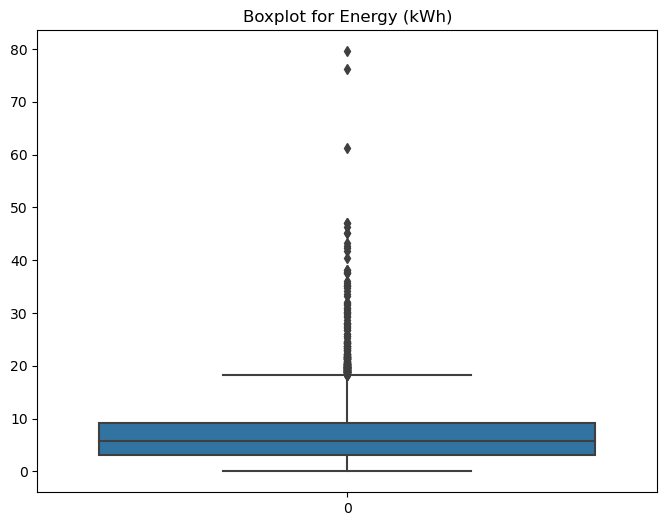

In [28]:
# Visualization- for outliers detection
#most of the users charging session are under 10KWh- not dropping any outliers-only for understanding data distribution 
#we are going to analyze the data as it is to understand user sessions.
for column in ['Energy (kWh)']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [29]:
# Checking unique values and their counts
for column in ['Org Name', 'Port Type', 'Plug Type', 'Ended By']:
    print(df[column].value_counts())

City of Palo Alto    9414
Name: Org Name, dtype: int64
Level 2    8742
Level 1     672
Name: Port Type, dtype: int64
J1772         8742
NEMA 5-20R     672
Name: Plug Type, dtype: int64
Plug Out at Vehicle             5385
Customer                        3907
CPS Server                        48
Door Open                         26
Unknown                           23
Door                              13
Final GFCI Tripped                 4
Plug Removed While Rebooting       3
Holster Plugin                     3
Door Closed                        1
Outlet Unreachable                 1
Name: Ended By, dtype: int64


In [30]:
# Converting to category type
for column in ['Port Type', 'Plug Type', 'Ended By']:
    df[column] = df[column].astype('category')

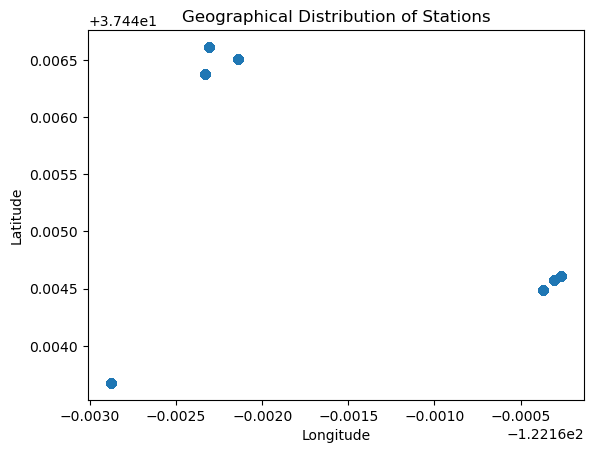

In [31]:
# Plotting for latitude and longitude- to find outliers
import matplotlib.pyplot as plt
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Stations')
plt.show()

In [32]:
#latitude and longtitude description
print(df['Latitude'].describe())
print(df['Longitude'].describe())

count    9414.000000
mean       37.445172
std         0.001129
min        37.443676
25%        37.444489
50%        37.444607
75%        37.446510
max        37.446613
Name: Latitude, dtype: float64
count    9414.000000
mean     -122.161476
std         0.001079
min      -122.162880
25%      -122.162308
50%      -122.162140
75%      -122.160309
max      -122.160263
Name: Longitude, dtype: float64


In [33]:
#checking outliers in latitide and longtitude-no outliers detected
lat_outliers = df[(df['Latitude'] < -90) | (df['Latitude'] > 90)]
long_outliers = df[(df['Longitude'] < -180) | (df['Longitude'] > 180)]
print("Latitude Outliers:\n", lat_outliers)
print("Longitude Outliers:\n", long_outliers)

Latitude Outliers:
 Empty DataFrame
Columns: [Station Name, MAC Address, Org Name, Start Date, End Date, Transaction Date (Pacific Time), Total Duration (hh:mm:ss), Charging Time (hh:mm:ss), Energy (kWh), GHG Savings (kg), Gasoline Savings (gallons), Port Type, Port Number, Plug Type, Address 1, City, State/Province, Postal Code, Country, Latitude, Longitude, Currency, Fee, Ended By, Plug In Event Id, Driver Postal Code, User ID]
Index: []
Longitude Outliers:
 Empty DataFrame
Columns: [Station Name, MAC Address, Org Name, Start Date, End Date, Transaction Date (Pacific Time), Total Duration (hh:mm:ss), Charging Time (hh:mm:ss), Energy (kWh), GHG Savings (kg), Gasoline Savings (gallons), Port Type, Port Number, Plug Type, Address 1, City, State/Province, Postal Code, Country, Latitude, Longitude, Currency, Fee, Ended By, Plug In Event Id, Driver Postal Code, User ID]
Index: []


In [34]:
#exporting cleaned csv file:
df.to_csv("clean_electric_vehicle_dataset.csv", index=False)

# Network Analysis

We have created three visulization using networkX tool along with pandas and matplotlib.

This helped us to understand the relationship between Charging Station and users

In [35]:
#loaded the cleaned file into dataframe df once again
df = pd.read_csv("clean_electric_vehicle_dataset.csv")

In [36]:
#verifying the data by retrieving first five rows
pd.set_option('display.max_columns', None)
df.head()

Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

                  Start Date                   End Date  \
0  2011-07-29 13:17:00-07:00  2011-07-29 16:20:00-07:00   
1  2011-07-29 17:00:00-07:00  2011-07-29 17:02:00-07:00   
2  2011-07-30 01:16:00-07:00  2011-07-30 05:34:00-07:00   
3  2011-07-30 07:51:00-07:00  2011-07-30 09:55:00-07:00   
4  2011-07-30 11:51:00-07:00  2011-07-30 13:03:00-07:00   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0       2011-07-29 23:20:00-07:00                   3:03:32   
1       2011-07-30 00:02:00-07:00                   0:02:06   
2       2011-07-30 12:34:00-07:00                   4:17:32   
3       2011-07-30 16:55:00-07:00                   2:03:24   
4       2011-07-30 20:03:00-07:00                   1:11:24   

  Charging Time (hh:mm:ss)  Energy (kWh)  GHG Savings (kg)  \
0                  1:54:03      6.249457             2.625   
1                  0:01:54      0.106588             0.045   
2                  4:17:28     14.951777             6.280   
3                  2:02:58      7.159643             3.007   
4                  0:43:54      1.957765             0.822   

   Gasoline Savings (gallons) Port Type  Port Number Plug Type  \
0                       0.784   Level 2            2     J1772   
1                       0.013   Level 2            2     J1772   
2                       1.876   Level 2            2     J1772   
3                       0.899   Level 2            2     J1772   
4                       0.246   Level 2            2     J1772   

          Address 1       City State/Province  Postal Code        Country  \
0  250 Hamilton Ave  Palo Alto     California        94301  United States   
1  250 Hamilton Ave  Palo Alto     California        94301  United States   
2  250 Hamilton Ave  Palo Alto     California        94301  United States   
3  250 Hamilton Ave  Palo Alto     California        94301  United States   
4  250 Hamilton Ave  Palo Alto     California        94301  United States   

    Latitude   Longitude Currency  Fee             Ended By  Plug In Event Id  \
0  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 3   
1  37.444572 -122.160309      USD    0             Customer                 4   
2  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 5   
3  37.444572 -122.160309      USD    0             Customer                 6   
4  37.444572 -122.160309      USD    0  Plug Out at Vehicle                 7   

   Driver Postal Code  User ID  
0               95124     3284  
1               94301     4169  
2               94301     4169  
3               94302     2545  
4               94043     3765

In [37]:
#graph name B is initialized using graph function
B = nx.Graph()
# Iterating over the dataset and add edges for the graph we have intialized
for index, row in df.iterrows():
    user = row['User ID']
    station = row['Station Name']
    B.add_edge(user, station)
    # Setting node types for users and stations
    B.nodes[user]["bipartite"] = 0
    B.nodes[station]["bipartite"] = 1

In [38]:
#below code helps us to get the nodes
users = [v for v in B.nodes if B.nodes[v]["bipartite"] == 0]
stations = [v for v in B.nodes if B.nodes[v]["bipartite"] == 1]

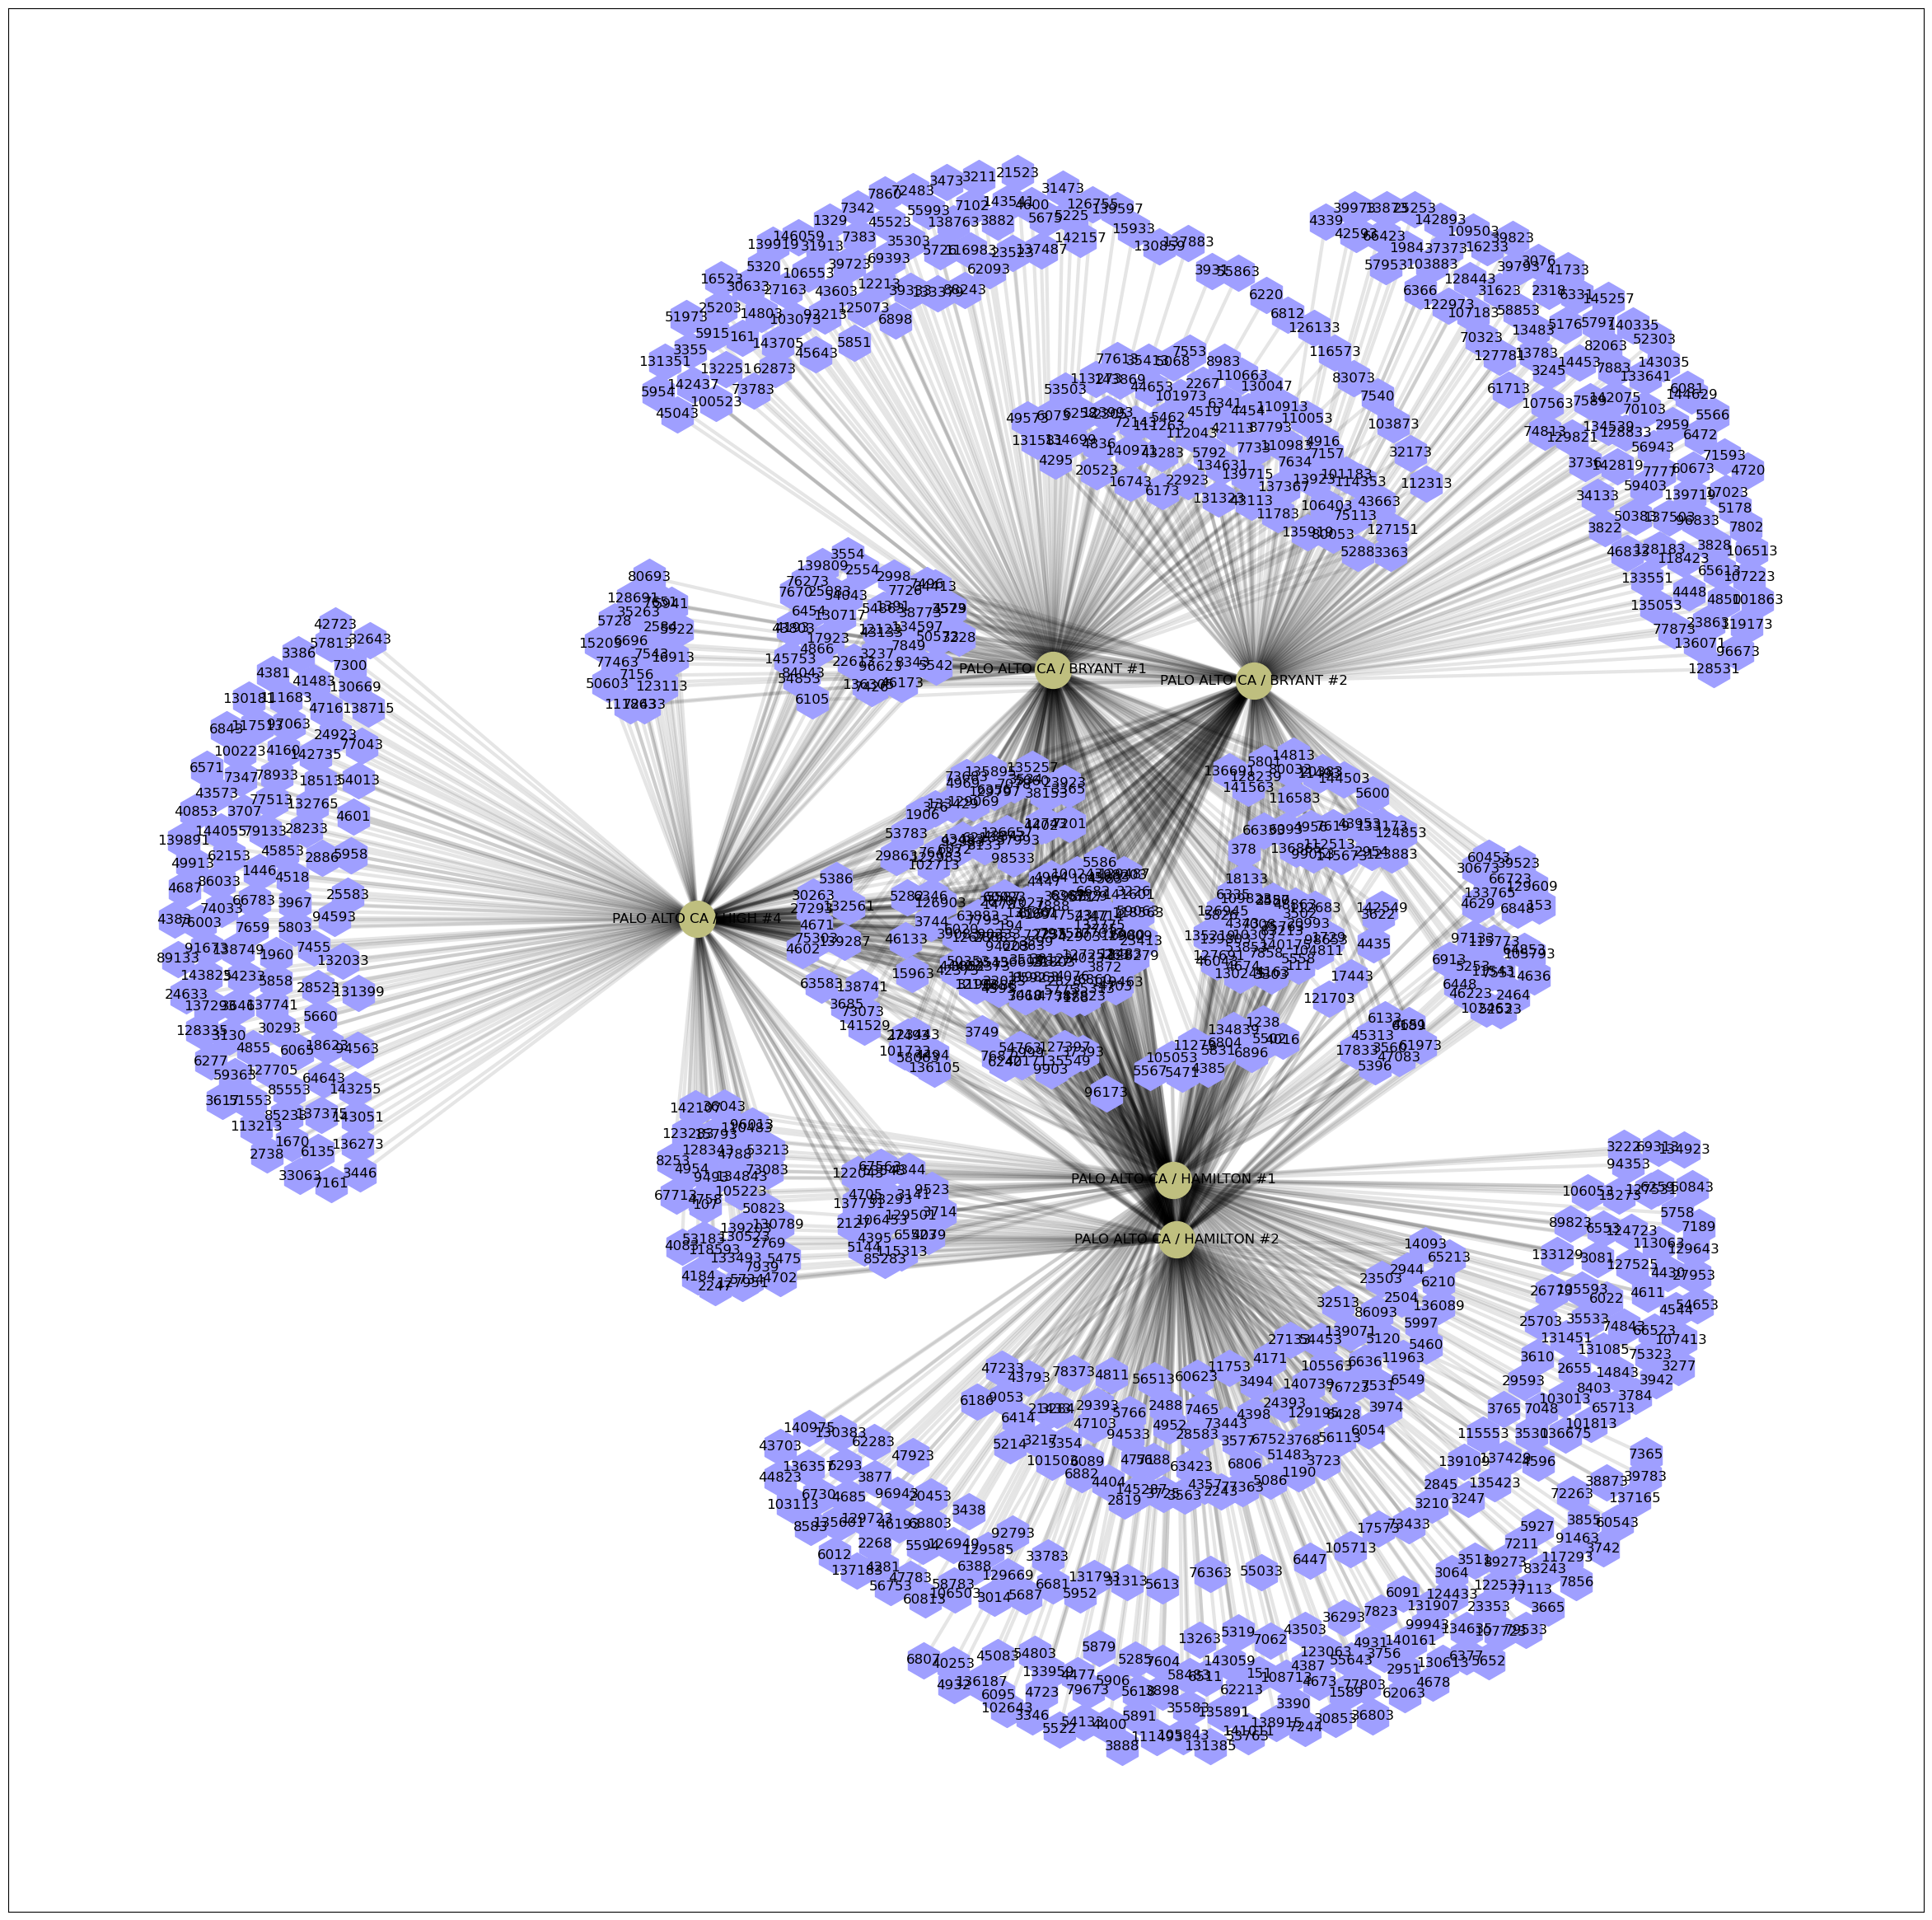

In [39]:
#visualizing the entire station in palo alto city with users visited details in graph visualization
plt.figure(figsize=(30,30))

# Using spring layout for better spacing
pos = nx.spring_layout(B)

# Drawing edges with reduced opacity
nx.draw_networkx_edges(B, pos, width=3, alpha=0.1)

# Drawing nodes with adjusted size and color
#user node in purple
nx.draw_networkx_nodes(B, pos, nodelist=users, node_color="#9f9fff", node_shape="h", node_size=1000) 
#station node in light yellow
nx.draw_networkx_nodes(B, pos, nodelist=stations, node_color="#bfbf7f", node_shape="o", node_size=1000)
# Drawing node labels
nx.draw_networkx_labels(B, pos)
# Saving the figure to a file
# Saving it with lower DPI and with tight bounding box
plt.savefig('1network_all_users&_all_Stations.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

In [40]:
# Using df DataFrame containing the dataset for calculation the exact numbers to understand the above graph
def analyze_charging_data(df):
    # Total number of unique stations and users
    total_stations = df['Station Name'].nunique()
    total_users = df['User ID'].nunique()

    # Users using only one station
    single_station_users = df.groupby('User ID')['Station Name'].nunique()
    single_station_users = single_station_users[single_station_users == 1]

    # Users using more than one station
    multiple_station_users = df.groupby('User ID')['Station Name'].nunique()
    multiple_station_users = multiple_station_users[multiple_station_users > 1]

    return total_stations, total_users, single_station_users, multiple_station_users

# Example usage
total_stations, total_users, single_station_users, multiple_station_users = analyze_charging_data(df)

# Displaying the results
print(f"Total Stations: {total_stations}")
print(f"Total Users: {total_users}")
print(f"Users Using Only One Station: {single_station_users.count()}")
print(f"Users Using More Than One Station: {multiple_station_users.count()}")


Total Stations: 5
Total Users: 970
Users Using Only One Station: 459
Users Using More Than One Station: 511


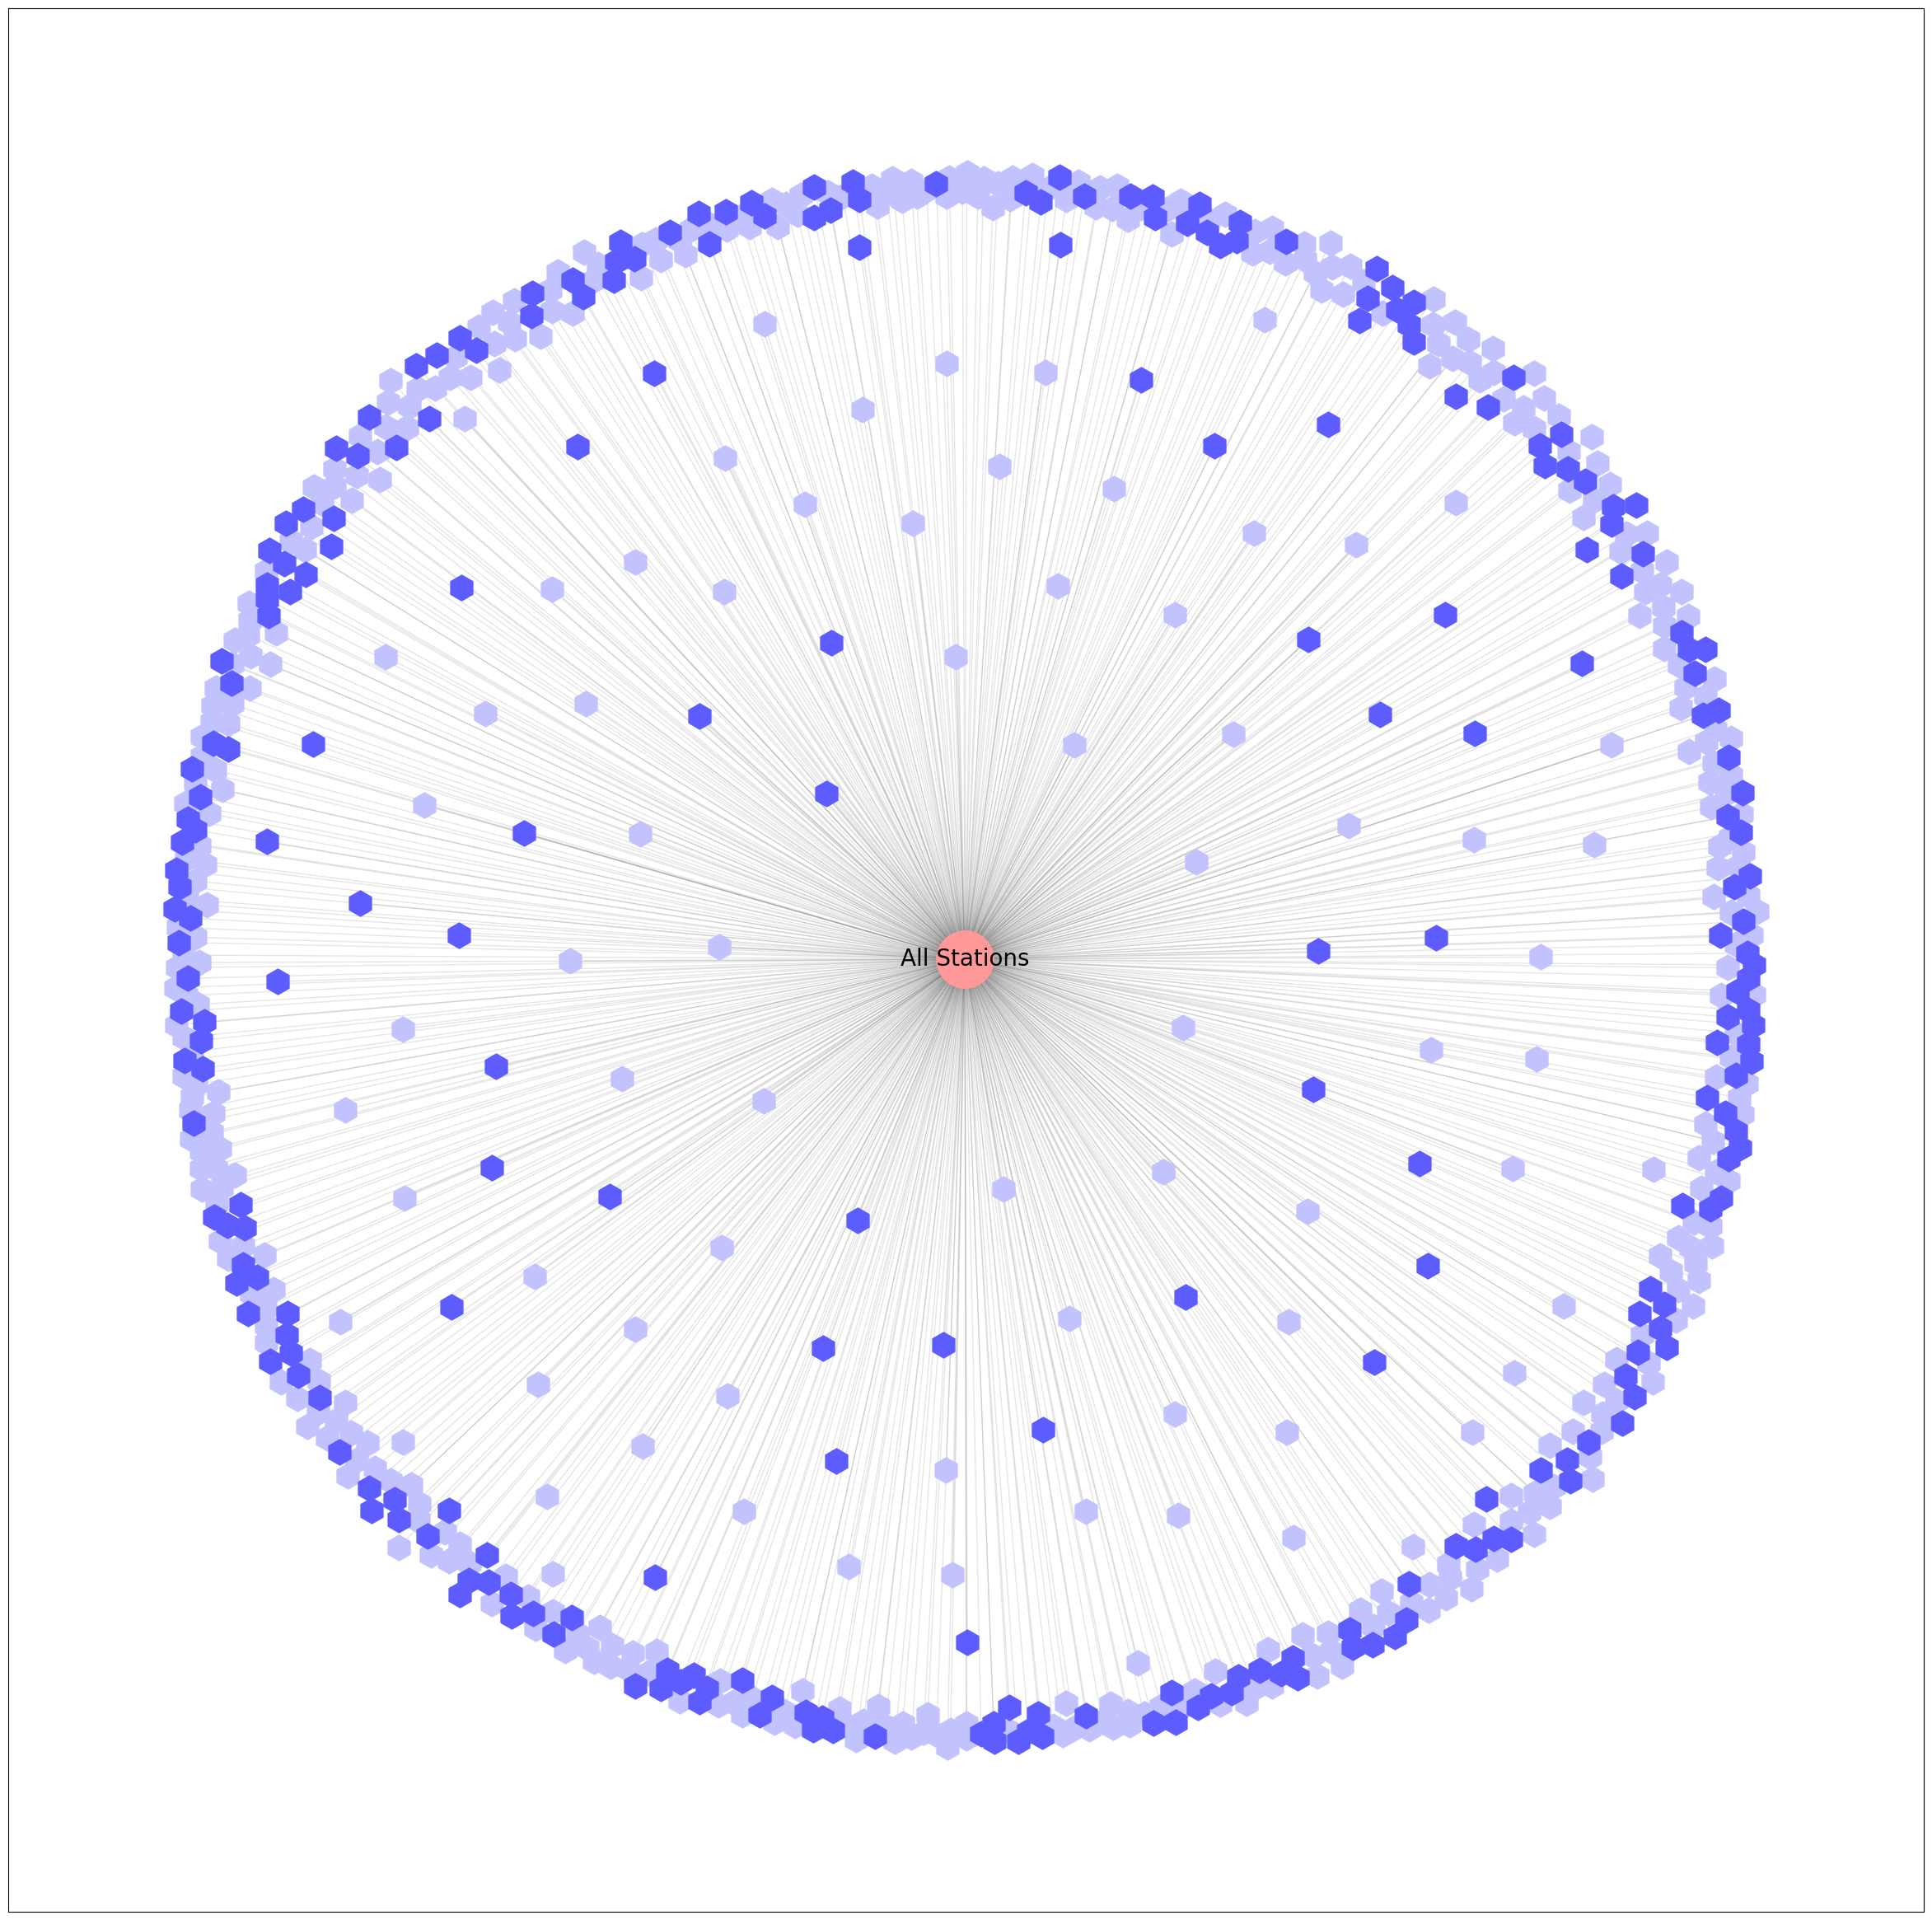

In [41]:
# this visualization helps us to understand the is unique users visits to the station higher or 
#user using more than one station visits are higher
# Creating a new graph for this visualization named G
G = nx.Graph()

# Grouping users based on their visits to find unique users and users using more than one station
users_with_unique_stations = []
users_with_more_than_two_stations = []

for user in users:
    # Counting adjacent stations for each user
    if B.degree(user) == 1:
        users_with_unique_stations.append(user)
        G.add_edge(user, "All Stations")
    elif B.degree(user) > 2:
        users_with_more_than_two_stations.append(user)
        G.add_edge(user, "All Stations")

plt.figure(figsize=(30,30))

# Increasing space between nodes and iterations for better layout
pos = nx.spring_layout(G, k=1, iterations=100)

# Drawing the edges with reduced opacity
nx.draw_networkx_edges(G, pos, width=1, alpha=0.1)

# Drawing the nodes with adjusted size and color based on the grouping
# Unique station users are marked in a lighter shade of blue
nx.draw_networkx_nodes(G, pos, nodelist=users_with_unique_stations, node_color="#c2c2ff", node_shape="h", node_size=500)

# Users with more than two stations are marked in a darker shade of blue
nx.draw_networkx_nodes(G, pos, nodelist=users_with_more_than_two_stations, node_color="#5c5cff", node_shape="h", node_size=500)

# Drawing the combined station node in a distinct color with the largest size
nx.draw_networkx_nodes(G, pos, nodelist=["All Stations"], node_color="#ff9999", node_shape="o", node_size=2500)

# Labeling the combined station node
nx.draw_networkx_labels(G, pos, {"All Stations": "All Stations"}, font_size=20)


# Saving the figure to a file
plt.savefig('2network_all_Stations.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

In [42]:
# To calculate the exact numbers of uinque users and users using more than one station using pandas

# 1. Listing distinct charging stations in Palo Alto
distinct_station_names = df['Station Name'].unique()
distinct_station_names_list = list(distinct_station_names)
print("Distinct Station Names in Palo Alto:", distinct_station_names_list)

# 2. Here we are trying to find the unique user count for each station who never visited other stations
user_station_counts = df.groupby('User ID')['Station Name'].nunique()
single_station_users = user_station_counts[user_station_counts == 1]
unique_users_per_station = df[df['User ID'].isin(single_station_users.index)].groupby('Station Name')['User ID'].nunique()

print("\nUnique Users Per Station (Only Visited That Station):")
print(unique_users_per_station)

# 3. Here we are trying to find unique users who visited specific pairs of stations
def users_visiting_stations(df, station1, station2):
    users_station1 = set(df[df['Station Name'] == station1]['User ID'])
    users_station2 = set(df[df['Station Name'] == station2]['User ID'])
    return len(users_station1.intersection(users_station2))

# Replacing these station names with the actual ones you're interested in
unique_users_hamilton = users_visiting_stations(df, 'PALO ALTO CA / HAMILTON #1', 'PALO ALTO CA / HAMILTON #2')
unique_users_bryant = users_visiting_stations(df, 'PALO ALTO CA / BRYANT #1', 'PALO ALTO CA / BRYANT #2')

print("\nUnique Users Visiting Both Hamilton #1 and #2:", unique_users_hamilton)
print("Unique Users Visiting Both Bryant #1 and #2:", unique_users_bryant)


Distinct Station Names in Palo Alto: ['PALO ALTO CA / HAMILTON #1', 'PALO ALTO CA / HAMILTON #2', 'PALO ALTO CA / HIGH #4', 'PALO ALTO CA / BRYANT #2', 'PALO ALTO CA / BRYANT #1']

Unique Users Per Station (Only Visited That Station):
Station Name
PALO ALTO CA / BRYANT #1       77
PALO ALTO CA / BRYANT #2       89
PALO ALTO CA / HAMILTON #1    107
PALO ALTO CA / HAMILTON #2     91
PALO ALTO CA / HIGH #4         95
Name: User ID, dtype: int64

Unique Users Visiting Both Hamilton #1 and #2: 251
Unique Users Visiting Both Bryant #1 and #2: 249


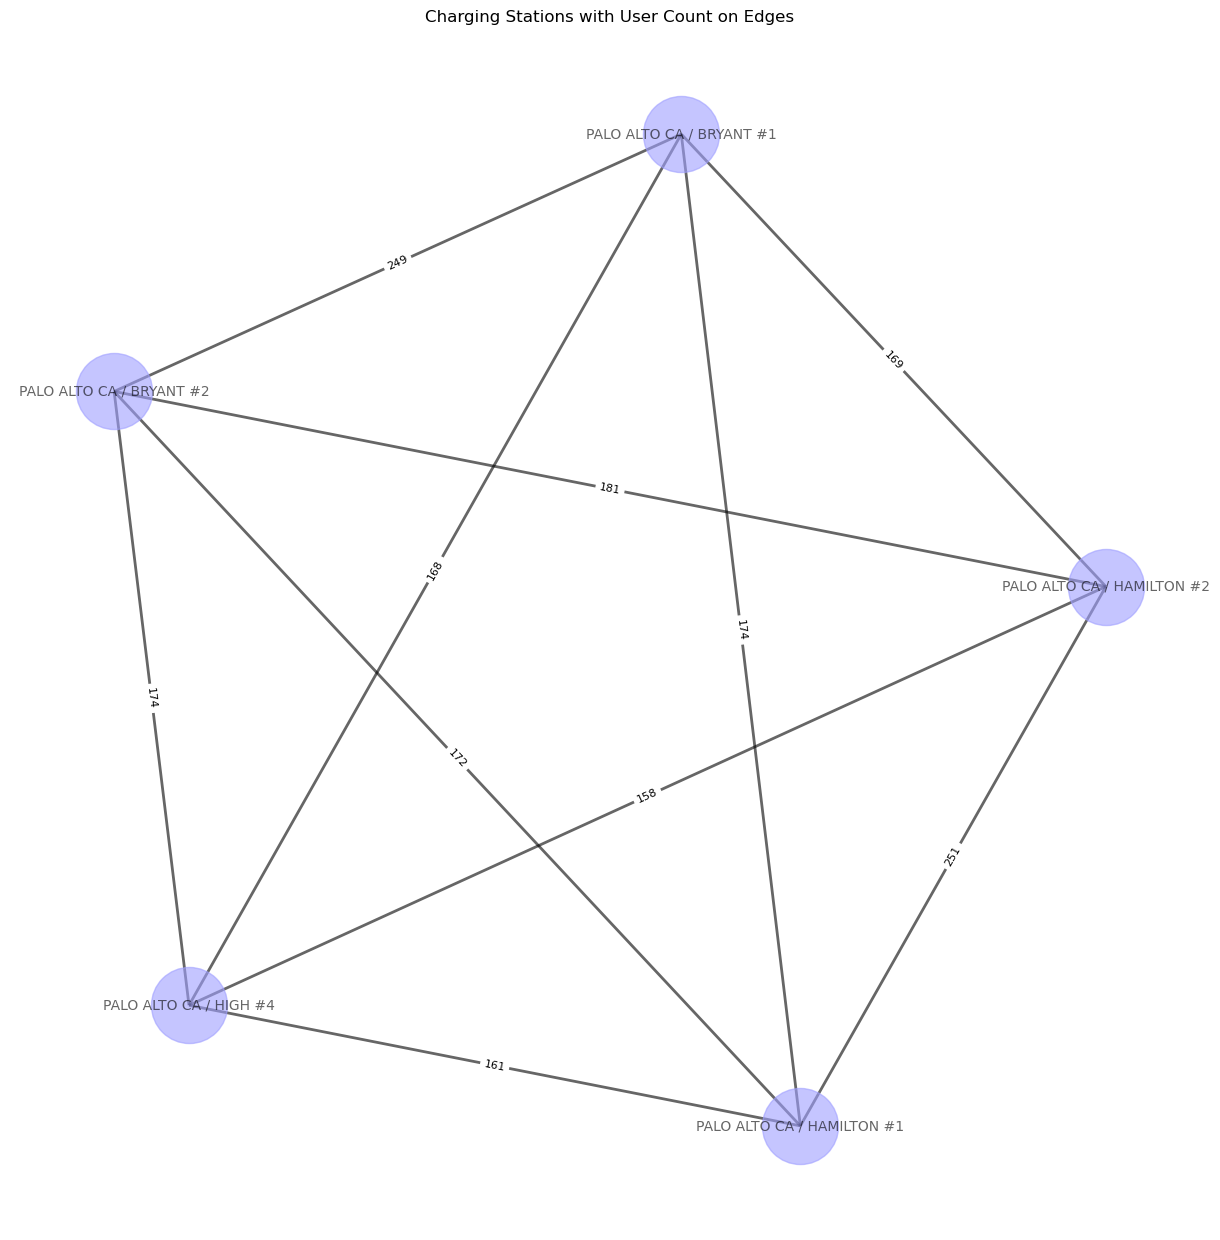

In [43]:
#creating this visualization to find the number of unique users who used two particular station together

G = nx.Graph()

# For each pair of unique stations a user has visited, we have added or updated an edge
for user, group in df.groupby('User ID'):
    stations = group['Station Name'].unique()
    for i in range(len(stations) - 1):
        for j in range(i+1, len(stations)):
            station1 = stations[i]
            station2 = stations[j]
            
            # If edge doesn't exist, create it with count = 1
            if not G.has_edge(station1, station2):
                G.add_edge(station1, station2, count=1)
            # If edge exists, increment the count
            else:
                G[station1][station2]['count'] += 1

# Setting up a larger figure size, so the visulazation can be seen better
plt.figure(figsize=(12, 12))

# Drawing the graph using the nodes and edges for relationship with count of users numbers
pos = nx.spring_layout(G, k=2.5)  # Further increase k for better separation
# Updated node_color and adjusted font size and alpha
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='#9f9fff', font_size=10, width=2, alpha=0.6)  

# Adding count of users as edge labels
edge_labels = {(u, v): G[u][v]['count'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)  # Adjusted font size for edge labels

plt.title('Charging Stations with User Count on Edges')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Manually adjust padding

# Saving the figure to a file
plt.savefig('3network_Usercount_Stations.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [44]:
#To find the numbers for users who users two, three, four or five stations

# Grouping by 'User ID' and geting the unique count of 'Station Name' for each user so we can find the count
user_station_counts = df.groupby('User ID')['Station Name'].nunique().reset_index(name='Station Count')

# we are filtering the users based on the number of stations they visited
two_station_users = user_station_counts[user_station_counts['Station Count'] == 2]
three_station_users = user_station_counts[user_station_counts['Station Count'] == 3]
four_station_users = user_station_counts[user_station_counts['Station Count'] == 4]
five_station_users = user_station_counts[user_station_counts['Station Count'] == 5]

# Getting the counts for each category
two_station_user_count = two_station_users['User ID'].nunique()
three_station_user_count = three_station_users['User ID'].nunique()
four_station_user_count = four_station_users['User ID'].nunique()
five_station_user_count = five_station_users['User ID'].nunique()

print(f"Unique users who use two stations: {two_station_user_count}")
print(f"Unique users who use three stations: {three_station_user_count}")
print(f"Unique users who use four stations: {four_station_user_count}")
print(f"Unique users who use five stations: {five_station_user_count}")


Unique users who use two stations: 252
Unique users who use three stations: 95
Unique users who use four stations: 80
Unique users who use five stations: 84


# Exploratory Data Analysis

### Descriptive statistics(Analysis of Charging Session Duration vs. Energy Consumed), High-Usage Stations vs. Frequent Users

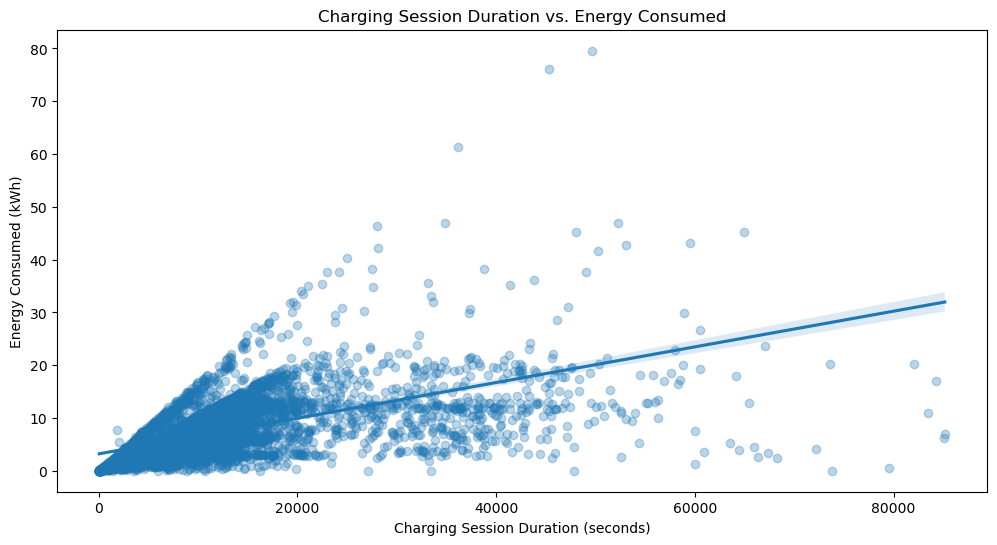

In [45]:
df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)'])
df['Energy (kWh)'] = pd.to_numeric(df['Energy (kWh)'])

plt.figure(figsize=(12, 6))
sns.regplot(x=df['Total Duration (hh:mm:ss)'].dt.total_seconds(), y=df['Energy (kWh)'], scatter_kws={'alpha':0.3})
plt.title('Charging Session Duration vs. Energy Consumed')
plt.xlabel('Charging Session Duration (seconds)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()

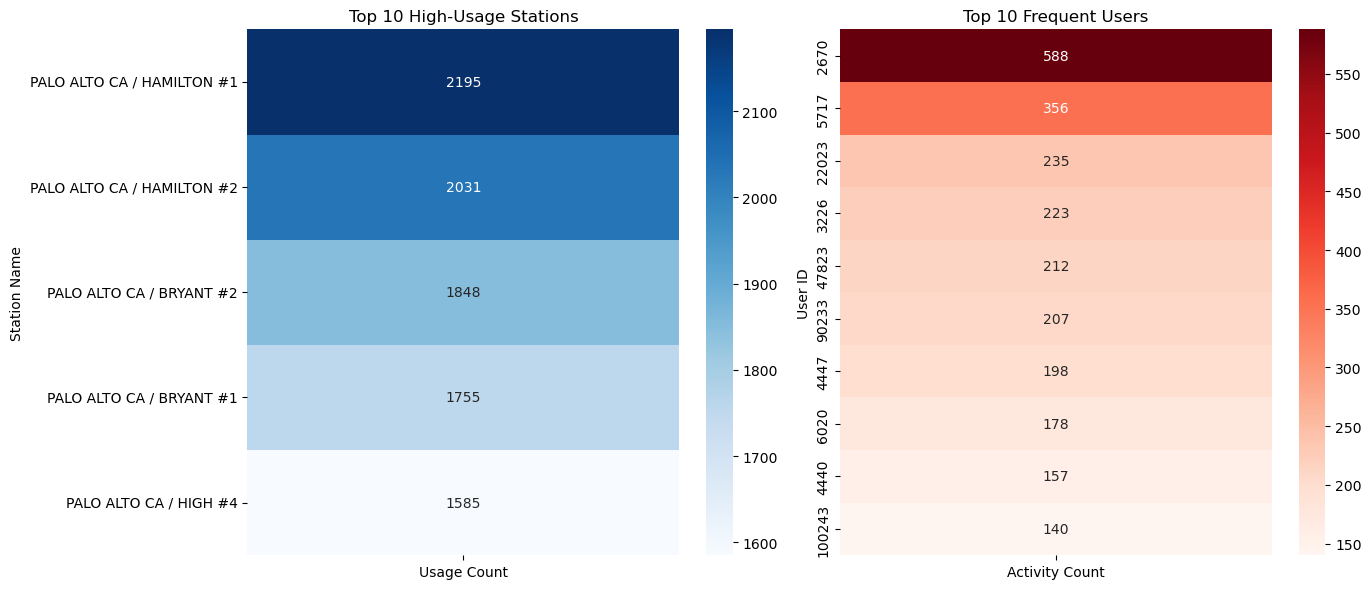

In [46]:
station_usage = df.groupby('Station Name')['User ID'].count().sort_values(ascending=False)
user_activity = df.groupby('User ID')['Station Name'].count().sort_values(ascending=False)

# Heatmap for High-Usage Stations and Frequent Users
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(station_usage.head(10).reset_index().rename(columns={'User ID': 'Usage Count'}).set_index('Station Name'),
            annot=True, cmap='Blues', fmt='g')
plt.title('Top 10 High-Usage Stations')

plt.subplot(1, 2, 2)
sns.heatmap(user_activity.head(10).reset_index().rename(columns={'Station Name': 'Activity Count'}).set_index('User ID'),
            annot=True, cmap='Reds', fmt='g')
plt.title('Top 10 Frequent Users')

plt.tight_layout()
plt.show()

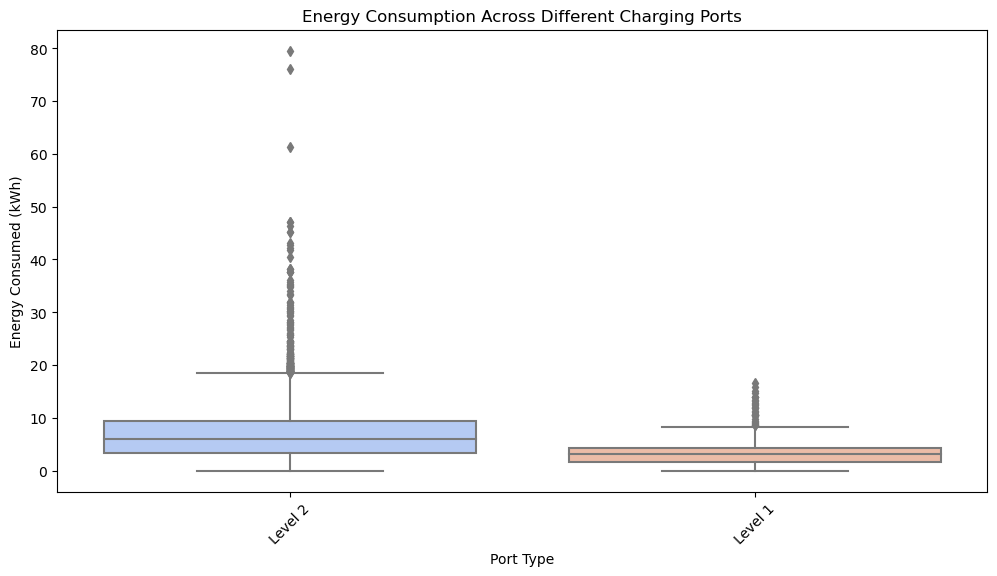

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Port Type', y='Energy (kWh)', data=df, palette='coolwarm')
plt.title('Energy Consumption Across Different Charging Ports')
plt.xlabel('Port Type')
plt.ylabel('Energy Consumed (kWh)')
plt.xticks(rotation=45)
plt.show()

### Charging Patterns Over Time, Energy Consumption Habits

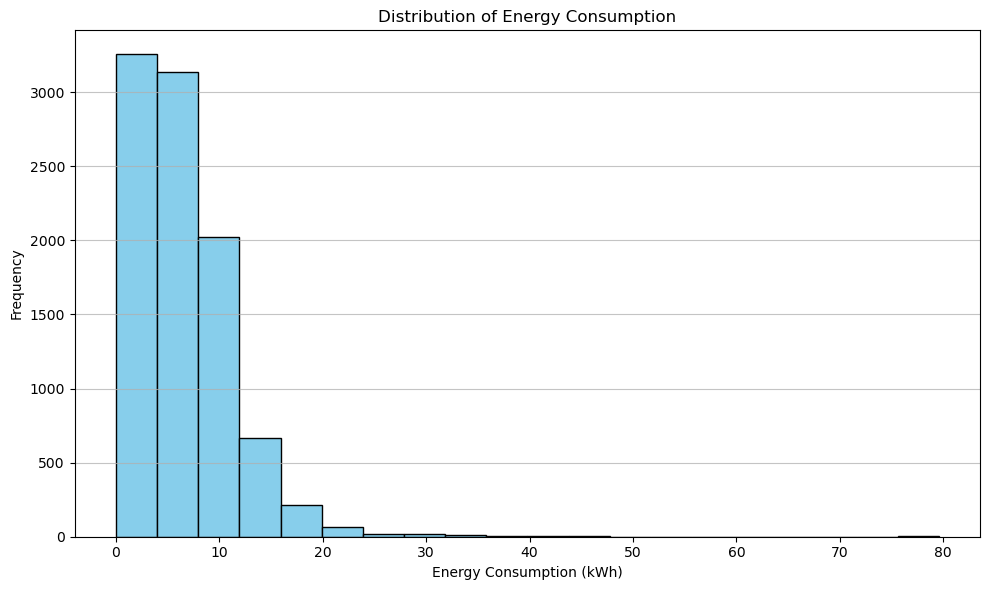

In [48]:
#Distribution plot to show the energy consumption
# Plotting a histogram for Energy Consumption
plt.figure(figsize=(10, 6))
plt.hist(df['Energy (kWh)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

# Show the plot
plt.show()

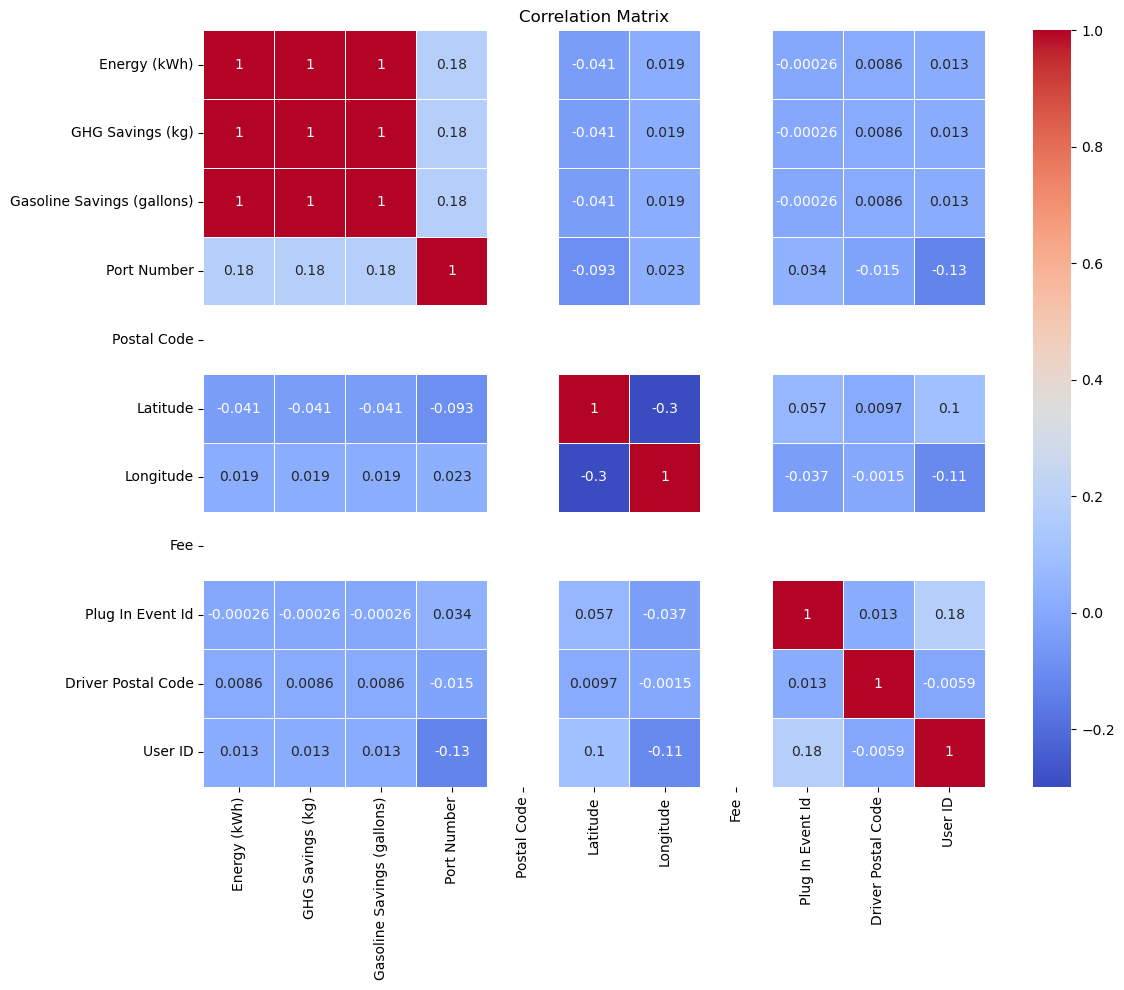

In [49]:
#correlation matrix created to understand the relationship between all the variable
# Selecting only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Creating a correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.tight_layout()

# Show the plot
plt.show()


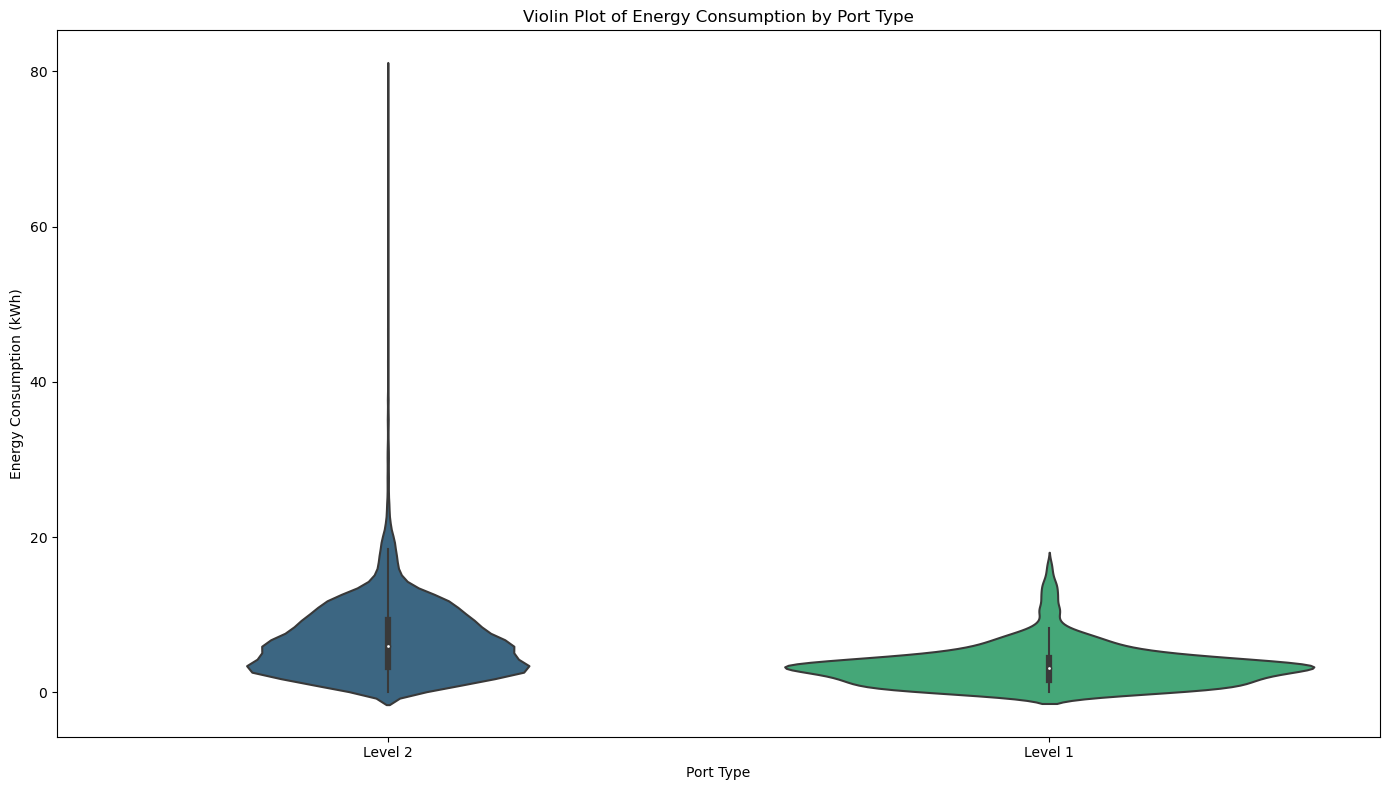

In [50]:
#Violin plot of Energy Consumption by Port Type
# Plotting a violin plot for Energy Consumption by Port Type
plt.figure(figsize=(14, 8))
sns.violinplot(x='Port Type', y='Energy (kWh)', data=df, palette='viridis')
plt.title('Violin Plot of Energy Consumption by Port Type')
plt.xlabel('Port Type')
plt.ylabel('Energy Consumption (kWh)')
plt.tight_layout()

# Show the plot
plt.show()


### Environmental Savings Distribution:

This histogram visualizes the distribution of environmental savings across charging sessions. The "Environmental Savings"

column likely represents the amount of emissions or environmental impact reduced by using electric vehicles and charging 

stations. Analyzing this distribution can provide insights into the overall environmental impact of the charging sessions.

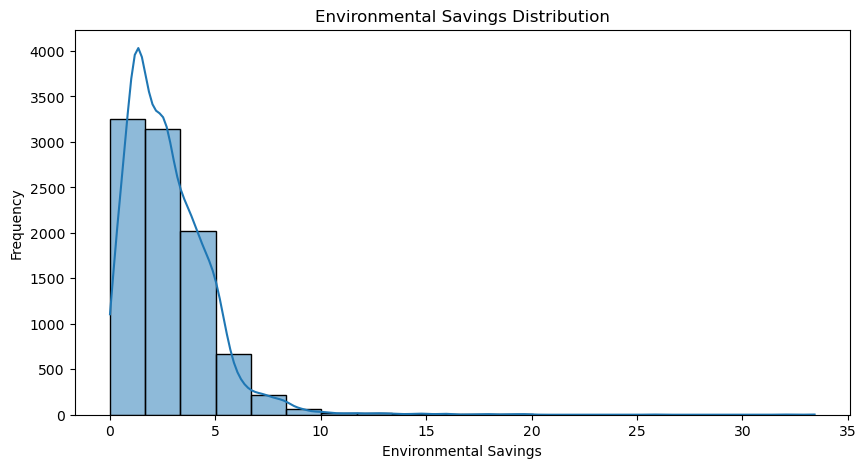

In [51]:
plt.figure(figsize=(10, 5))
sns.histplot(df['GHG Savings (kg)'], bins=20, kde=True)
plt.title('Environmental Savings Distribution')
plt.xlabel('Environmental Savings')
plt.ylabel('Frequency')
#plt.savefig('environsavdisss.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### Plug Type Preferences:

The pie chart visualizes the distribution of plug types used in charging sessions. Each slice of the pie represents a different 

plug type, and the size of the slice corresponds to the proportion of charging sessions that used that plug type. This chart 

gives a clear overview of the popularity of different plug types.

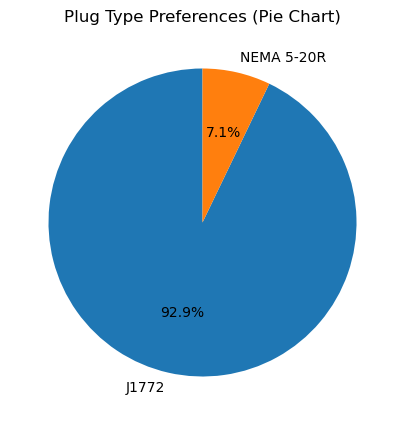

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(10, 5))
plug_type_counts = df['Plug Type'].value_counts()
plt.pie(plug_type_counts, labels=plug_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Plug Type Preferences (Pie Chart)')
plt.show()
plt.savefig('plug11.png', format='png', dpi=300, bbox_inches='tight')


### Session Ending Behavior Analysis, Analysis of Charging Session Duration vs. Energy Consumed

In [53]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'], infer_datetime_format=True, utc=True).dt.tz_convert(None)
df['Transaction Date (Pacific Time)'] = pd.to_datetime(df['Transaction Date (Pacific Time)'])
# Extract hour and day of the week when sessions ended
df['End Hour'] = df['End Date'].dt.hour
df['End Day'] = df['End Date'].dt.day_name()

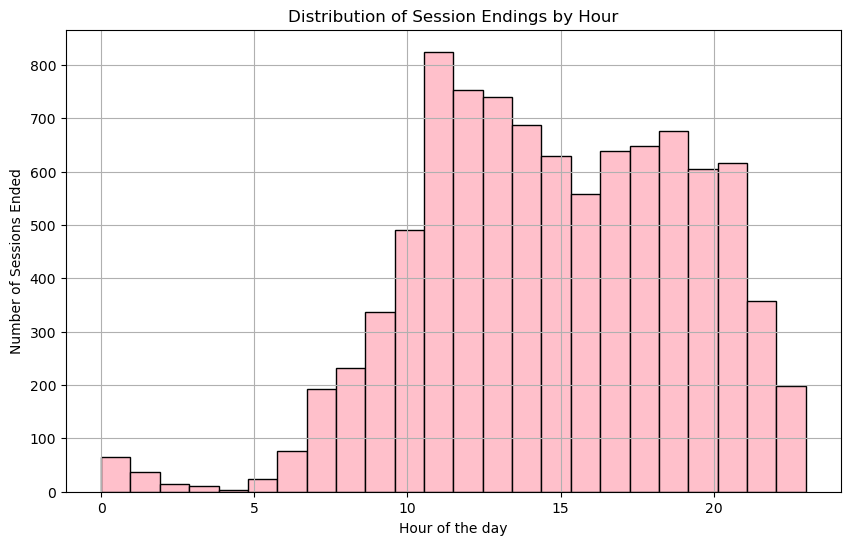

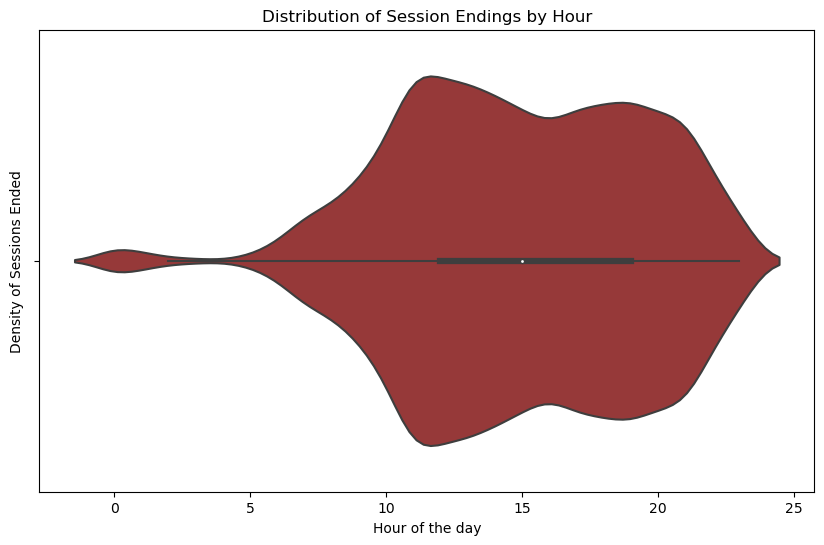

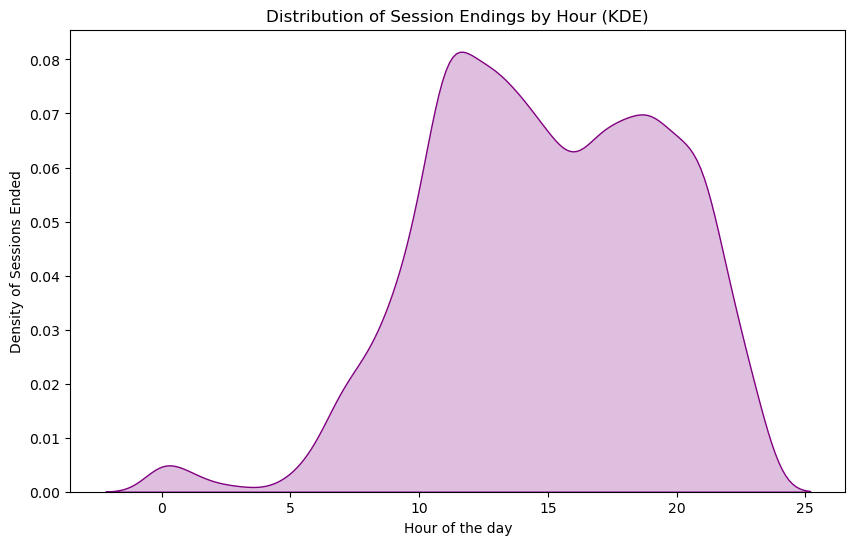

In [54]:
# Plotting session endings by hour
plt.figure(figsize=(10, 6))
df['End Hour'].hist(bins=24, color='pink', edgecolor='black')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Sessions Ended')
plt.title('Distribution of Session Endings by Hour')
plt.show()

# Violin plot for session endings by hour
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['End Date'].dt.hour, color='brown')
plt.xlabel('Hour of the day')
plt.ylabel('Density of Sessions Ended')
plt.title('Distribution of Session Endings by Hour')
plt.show()

# Kernel Density Estimate (KDE) plot for session endings by hour
plt.figure(figsize=(10, 6))
sns.kdeplot(df['End Date'].dt.hour, fill=True, color='purple')
plt.xlabel('Hour of the day')
plt.ylabel('Density of Sessions Ended')
plt.title('Distribution of Session Endings by Hour (KDE)')
plt.show()

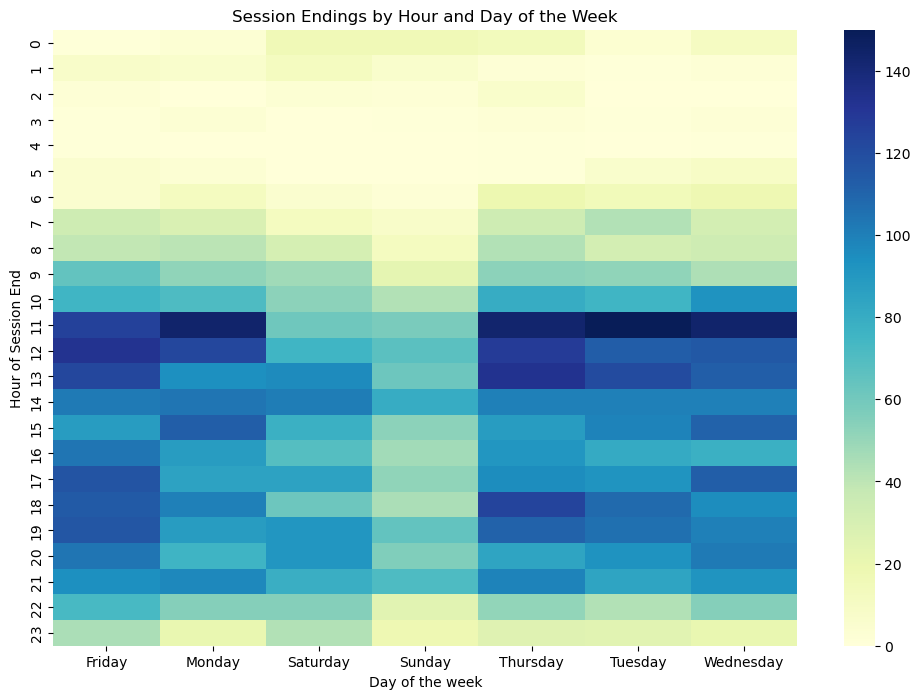

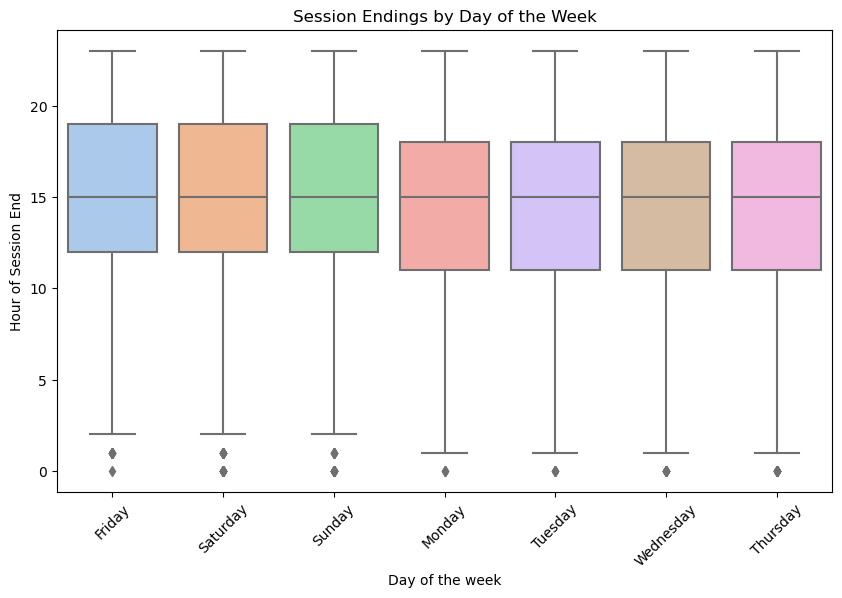

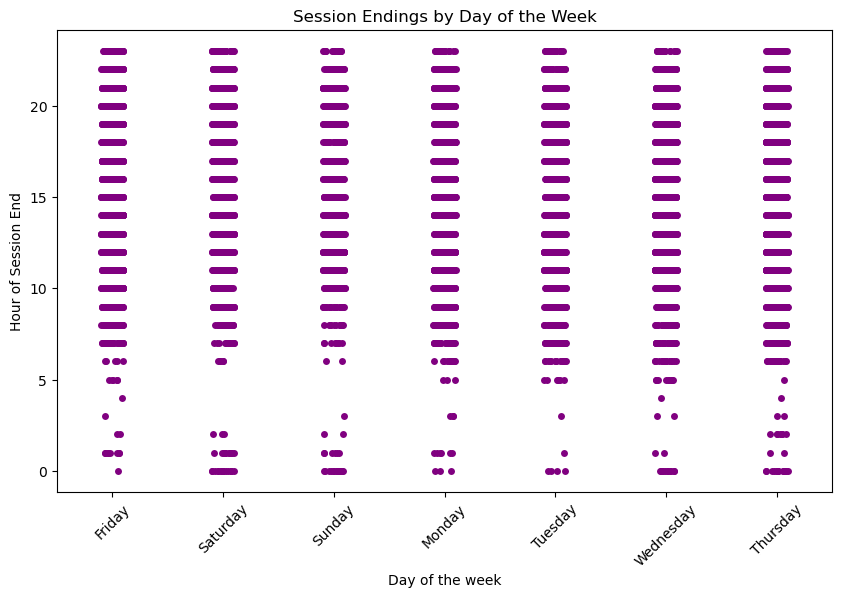

In [55]:
pivot = df.pivot_table(index=df['End Date'].dt.hour, columns=df['End Date'].dt.day_name(), aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
# Heatmap for session endings by day of the week
sns.heatmap(pivot, cmap='YlGnBu')
plt.xlabel('Day of the week')
plt.ylabel('Hour of Session End')
plt.title('Session Endings by Hour and Day of the Week')
plt.show()

# Box plot for session endings by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['End Date'].dt.day_name(), y=df['End Date'].dt.hour, palette='pastel')
plt.xlabel('Day of the week')
plt.ylabel('Hour of Session End')
plt.title('Session Endings by Day of the Week')
plt.xticks(rotation=45)
plt.show()

# Strip plot for session endings by day of the week
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['End Date'].dt.day_name(), y=df['End Date'].dt.hour, color='purple')
plt.xlabel('Day of the week')
plt.ylabel('Hour of Session End')
plt.title('Session Endings by Day of the Week')
plt.xticks(rotation=45)
plt.show()

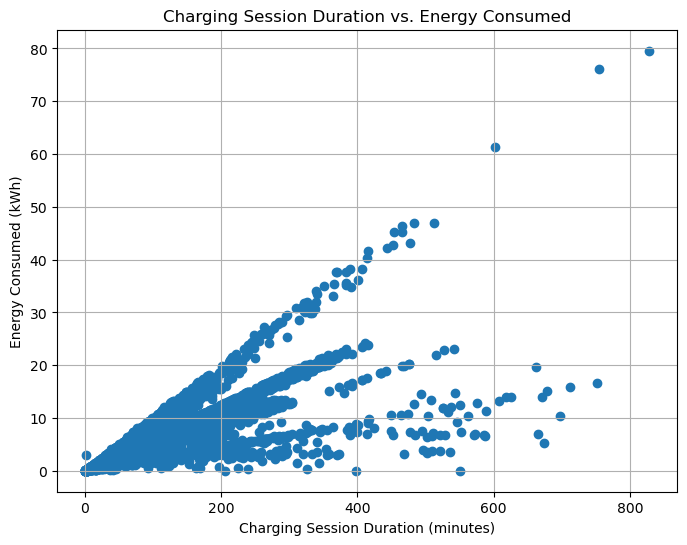

<Figure size 1200x500 with 0 Axes>

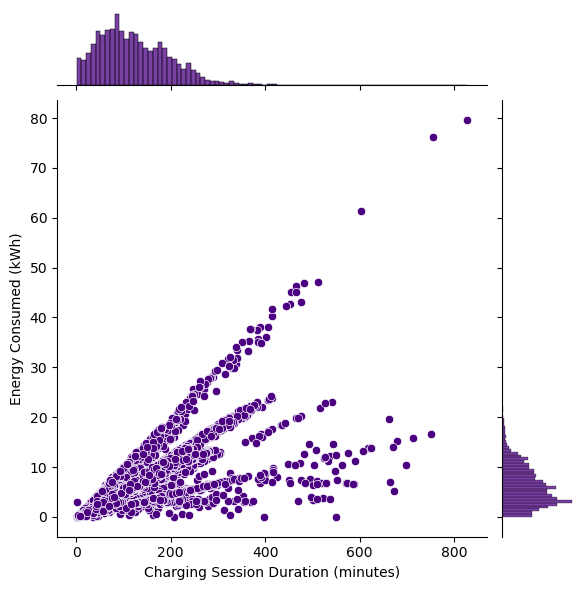

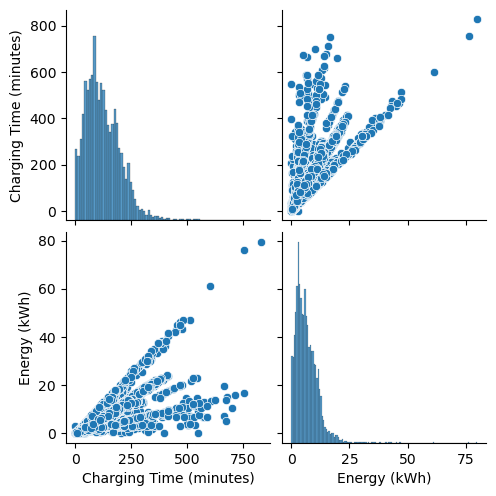

In [56]:
# Convert duration to minutes for easier analysis
df['Charging Time (minutes)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)']).dt.total_seconds() / 60
# Plotting charging session duration vs. energy consumed
plt.figure(figsize=(8, 6))
plt.scatter(df['Charging Time (minutes)'], df['Energy (kWh)'])
plt.xlabel('Charging Session Duration (minutes)')
plt.ylabel('Energy Consumed (kWh)')
plt.title('Charging Session Duration vs. Energy Consumed')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
# Joint plot for charging session duration vs. energy consumed
sns.jointplot(x='Charging Time (minutes)', y='Energy (kWh)', data=df, color='indigo')
plt.xlabel('Charging Session Duration (minutes)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()

# Pair plot for multiple variable comparison
sns.pairplot(df[['Charging Time (minutes)', 'Energy (kWh)', 'End Date']], kind='scatter')
plt.show()